# Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import association_metrics as am
from scipy.stats import f_oneway
import polars as pl

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

# 1. Общее исследование данных

## 1.1 Основные характеристики переменных

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [5]:
df.shape

(12330, 18)

Информация о типах данных и пропусках

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Основные характеристики переменных

In [7]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3348,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


Итого имеем 9 числовых признаков и 7 категориальных.

Проверка на наличие дубликатов

In [8]:
df.duplicated().sum()

109

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.reset_index(drop=True)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12216,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12217,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12218,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12219,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## 1.2 Работа с пропущенными значениями

In [11]:
df.isnull().mean() * 100

Administrative             0.000000
Administrative_Duration    0.000000
Informational              0.000000
Informational_Duration     1.628345
ProductRelated             0.000000
ProductRelated_Duration    4.001309
BounceRates                0.000000
ExitRates                  0.810081
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

Доля пропусков невелика, пропущенные значения переменных можно заменить их средними (медианными) значениями.

In [12]:
median_informational_duration = df['Informational_Duration'].median()
df['Informational_Duration'].fillna(median_informational_duration, inplace=True)

In [13]:
median_product_related_duration = df['ProductRelated_Duration'].median()
df['ProductRelated_Duration'].fillna(median_product_related_duration, inplace=True)

In [14]:
median_exit_rates = df['ExitRates'].median()
df['ExitRates'].fillna(median_exit_rates, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12221 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12221 non-null  int64  
 1   Administrative_Duration  12221 non-null  float64
 2   Informational            12221 non-null  int64  
 3   Informational_Duration   12221 non-null  float64
 4   ProductRelated           12221 non-null  int64  
 5   ProductRelated_Duration  12221 non-null  float64
 6   BounceRates              12221 non-null  float64
 7   ExitRates                12221 non-null  float64
 8   PageValues               12221 non-null  float64
 9   SpecialDay               12221 non-null  float64
 10  Month                    12221 non-null  object 
 11  OperatingSystems         12221 non-null  int64  
 12  Browser                  12221 non-null  int64  
 13  Region                   12221 non-null  int64  
 14  TrafficType           

# 2. Однофакторный анализ

## Administrative

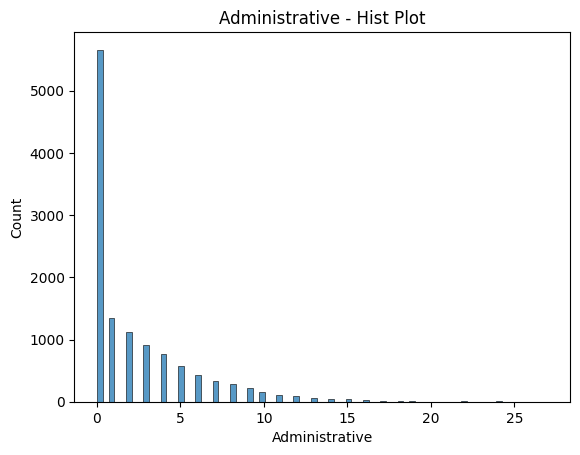

In [16]:
sns.histplot(data=df, x='Administrative')
plt.title('Administrative - Hist Plot')
plt.show()

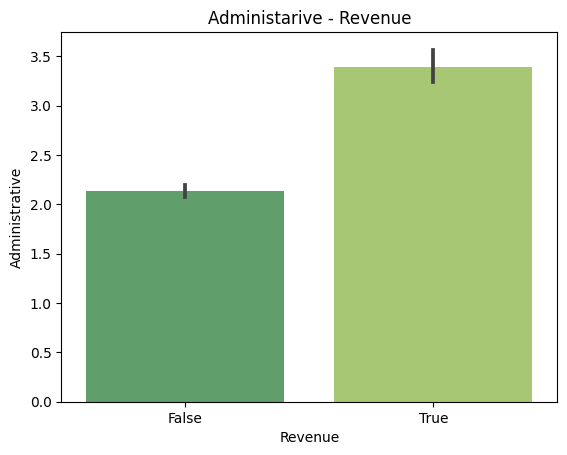

In [17]:
sns.barplot(data=df, x='Revenue', y='Administrative', palette='summer')
plt.title('Administarive - Revenue')
plt.show()

Большее количество просмотренных административных страниц положительно коррелирует с фактом покупки. При этом в большинстве случаев просмотр данных страниц равен 0.

## Administrative_Duration

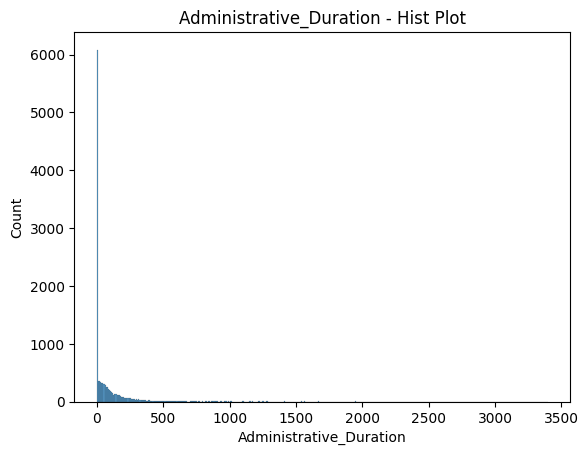

In [18]:
sns.histplot(data=df, x='Administrative_Duration')
plt.title('Administrative_Duration - Hist Plot')
plt.show()

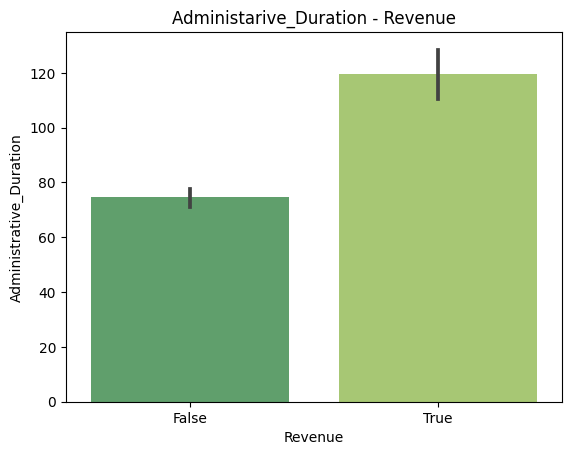

In [19]:
sns.barplot(data=df, x='Revenue', y='Administrative_Duration', palette='summer')
plt.title('Administarive_Duration - Revenue')
plt.show()

Большая продолжительность просмотра административных страниц положительно коррелирует с фактом покупки. При этом в большинстве случаев продолжительность составляет 0.

## Informational

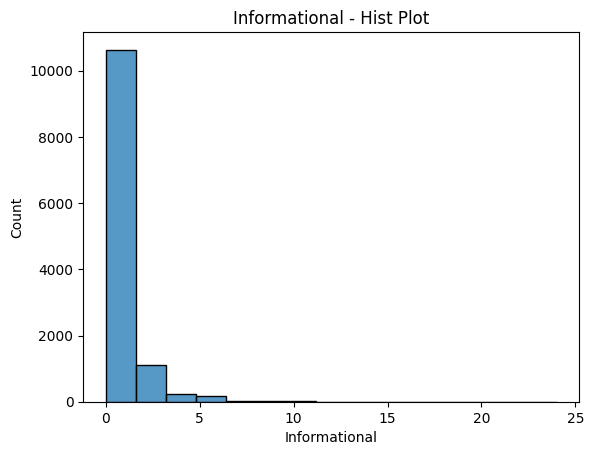

In [20]:
sns.histplot(data=df, x='Informational')
plt.title('Informational - Hist Plot')
plt.show()

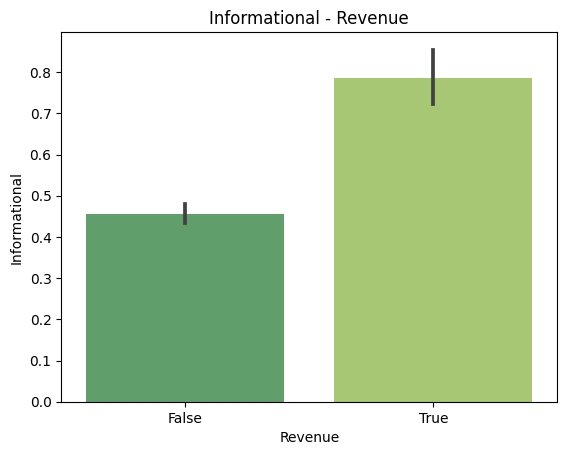

In [21]:
sns.barplot(data=df, x='Revenue', y='Informational', palette='summer')
plt.title('Informational - Revenue')
plt.show()

Большее количество просмотренных информационных страниц положительно коррелирует с фактом покупки. При этом в большинстве случаев просмотр данных страниц равен 0.

## Informational_Duration

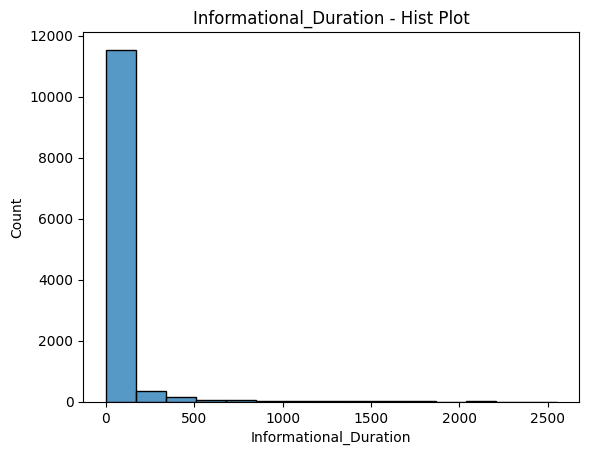

In [22]:
sns.histplot(data=df, x='Informational_Duration')
plt.title('Informational_Duration - Hist Plot')
plt.show()

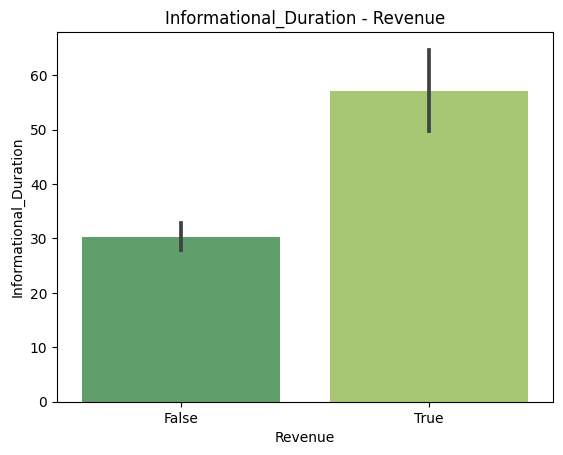

In [23]:
sns.barplot(data=df, x='Revenue', y='Informational_Duration', palette='summer')
plt.title('Informational_Duration - Revenue')
plt.show()

Большая продолжительность просмотра информационных страниц положительно коррелирует с фактом покупки. При этом в большинстве случаев продолжительность составляет 0.

## ProductRelated

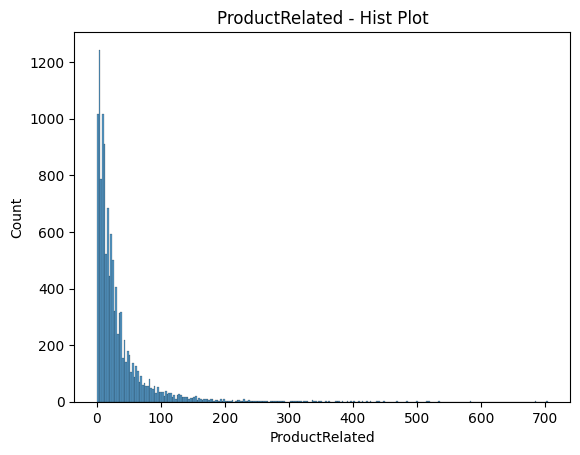

In [24]:
sns.histplot(data=df, x='ProductRelated')
plt.title('ProductRelated - Hist Plot')
plt.show()

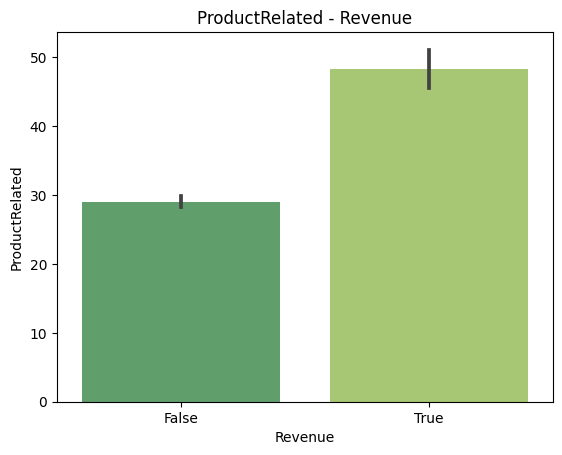

In [25]:
sns.barplot(data=df, x='Revenue', y='ProductRelated', palette='summer')
plt.title('ProductRelated - Revenue')
plt.show()

Большее количество просмотренных продуктовых страниц положительно коррелирует с фактом покупки.

## ProductRelated_Duration

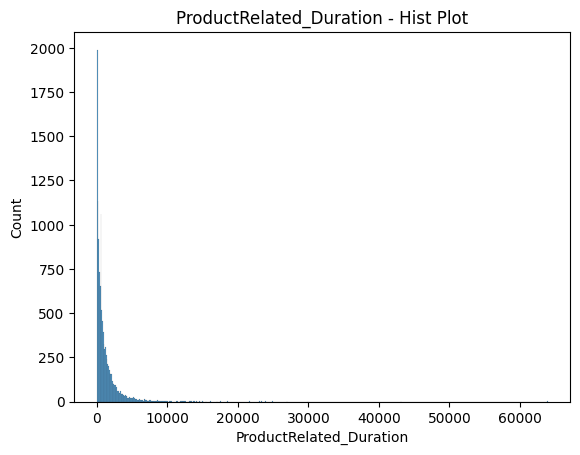

In [26]:
sns.histplot(data=df, x='ProductRelated_Duration')
plt.title('ProductRelated_Duration - Hist Plot')
plt.show()

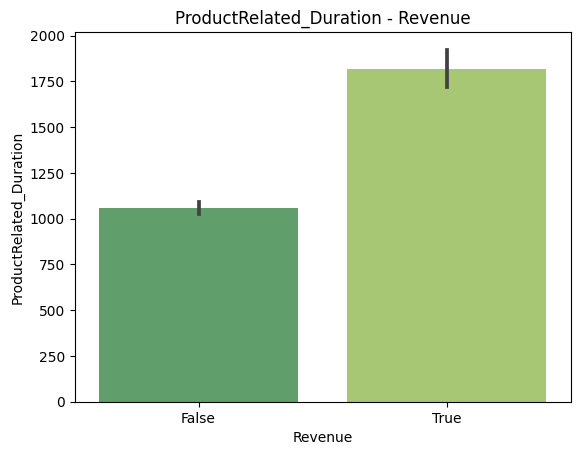

In [27]:
sns.barplot(data=df, x='Revenue', y='ProductRelated_Duration', palette='summer')
plt.title('ProductRelated_Duration - Revenue')
plt.show()

Большая продолжительность просмотра продуктовых страниц положительно коррелирует с фактом покупки.

## BounceRates

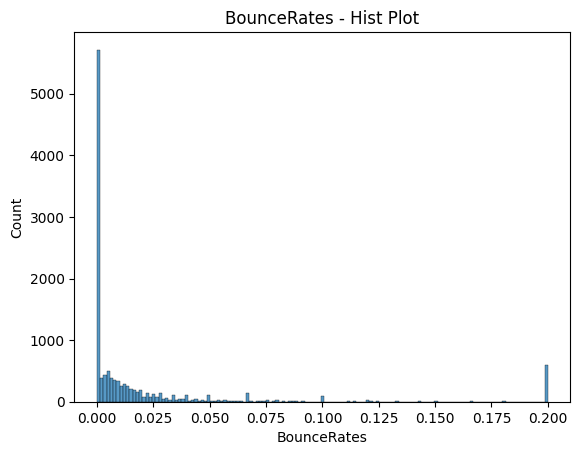

In [28]:
sns.histplot(data=df, x='BounceRates')
plt.title('BounceRates - Hist Plot')
plt.show()

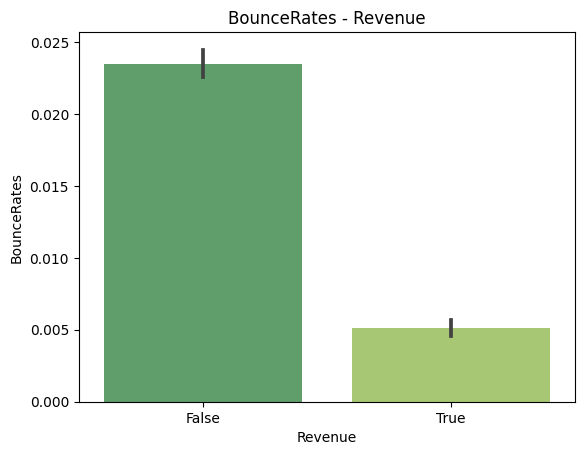

In [29]:
sns.barplot(data=df, x='Revenue', y='BounceRates', palette='summer')
plt.title('BounceRates - Revenue')
plt.show()

Большее значение метрики Bounce Rate отрицательно коррелирует с фактом покупки.

## ExitRates

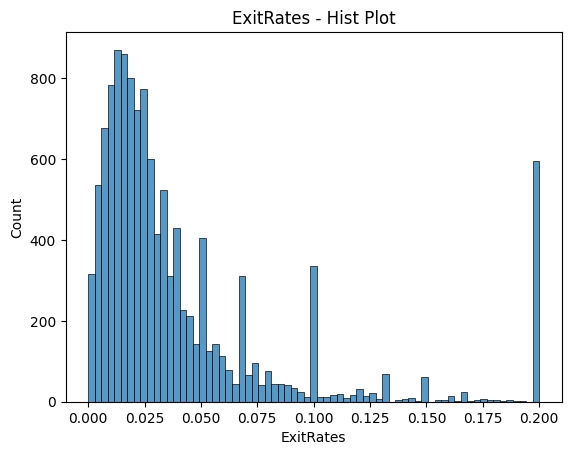

In [30]:
sns.histplot(data=df, x='ExitRates')
plt.title('ExitRates - Hist Plot')
plt.show()

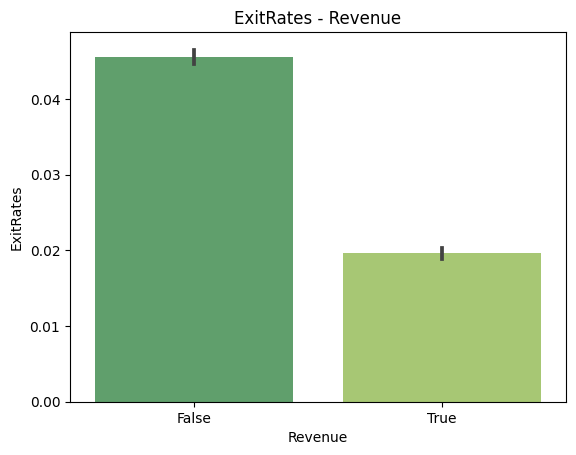

In [31]:
sns.barplot(data=df, x='Revenue', y='ExitRates', palette='summer')
plt.title('ExitRates - Revenue')
plt.show()

Большее значение метрики Exit Rate отрицательно коррелирует с фактом покупки.

## PageValues

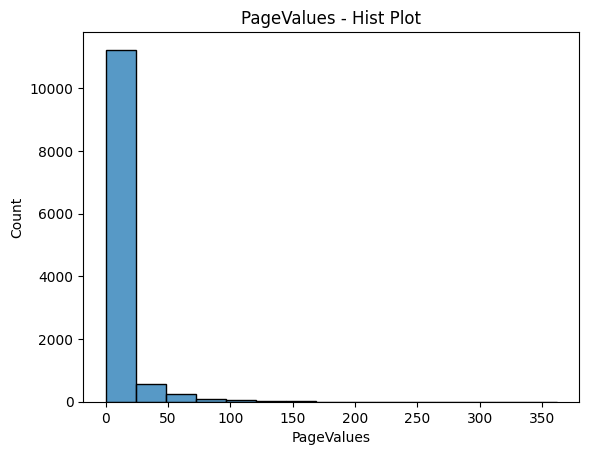

In [32]:
sns.histplot(data=df, x='PageValues')
plt.title('PageValues - Hist Plot')
plt.show()

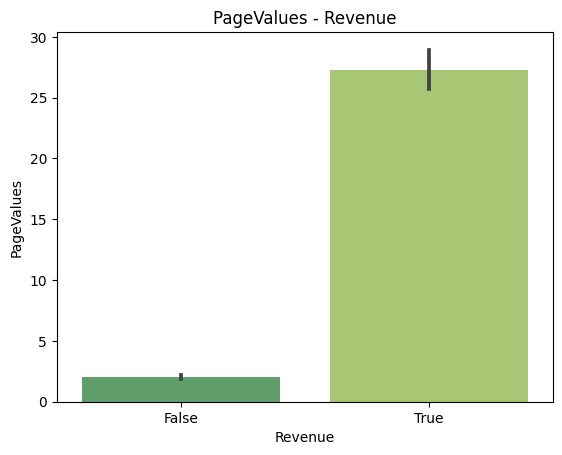

In [33]:
sns.barplot(data=df, x='Revenue', y='PageValues', palette='summer')
plt.title('PageValues - Revenue')
plt.show()

Большее количество просмотренных страниц положительно коррелирует с фактом покупки.

## SpecialDay

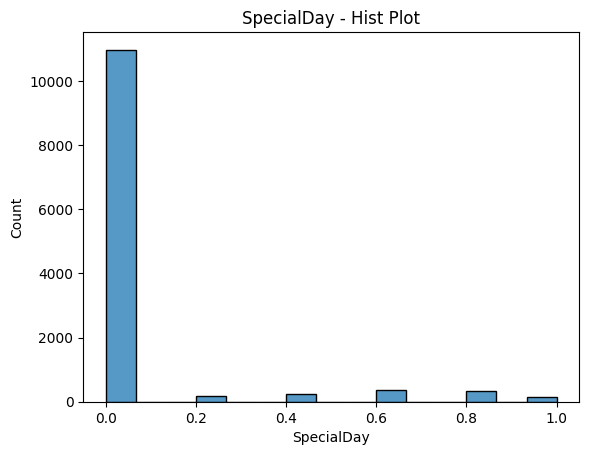

In [34]:
sns.histplot(data=df, x='SpecialDay')
plt.title('SpecialDay - Hist Plot')
plt.show()

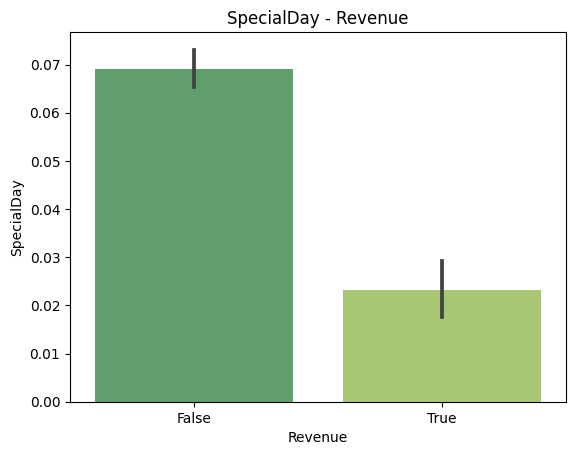

In [35]:
sns.barplot(data=df, x='Revenue', y='SpecialDay', palette='summer')
plt.title('SpecialDay - Revenue')
plt.show()

Большее значение метрики Special Day отрицательно коррелирует с фактом покупки.

## Month

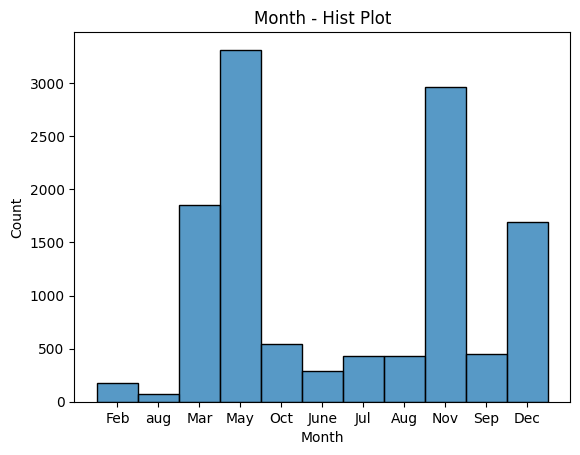

In [36]:
sns.histplot(data=df, x='Month')
plt.title('Month - Hist Plot')
plt.show()

Большая доля наблюдений приходится на май, ноябрь, март и декабрь.

При этом август включен в двух формах: Aug и aug. Надо это поправить

In [37]:
df['Month'].replace('aug', 'Aug', inplace=True)

In [38]:
df['Month'].value_counts(normalize=True)

May     0.271336
Nov     0.242615
Mar     0.151952
Dec     0.138778
Oct     0.044595
Aug     0.040995
Sep     0.036495
Jul     0.035104
June    0.023321
Feb     0.014811
Name: Month, dtype: float64

In [39]:
df_gr_month = df.groupby(by=['Month']).agg(RevenueMean=('Revenue', 'mean')).reset_index(drop=False)
df_gr_month = df_gr_month.sort_values(by=['RevenueMean'], ascending=[False]).reset_index(drop=True)
df_gr_month

,Month,RevenueMean
0,Nov,0.253963
1,Oct,0.211009
2,Sep,0.192825
3,Aug,0.183633
4,Jul,0.149184
5,Dec,0.125590
6,May,0.109469
7,Mar,0.102316
8,June,0.101754
9,Feb,0.016575


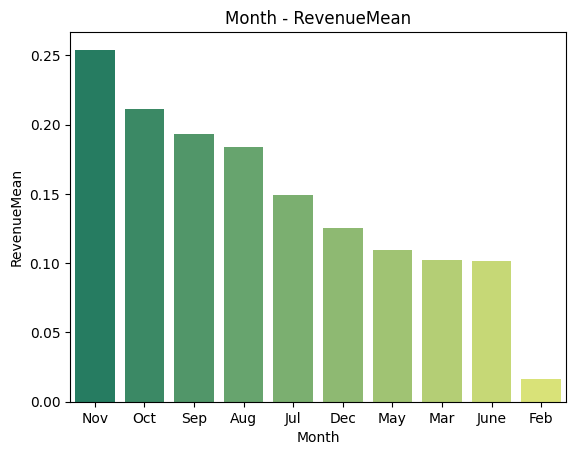

In [40]:
sns.barplot(data=df_gr_month, x='Month', y='RevenueMean', palette='summer')
plt.title('Month - RevenueMean')
plt.show()

При этом доля покупок наибольшая у осенних месяцев: ноябрь, октябрь, сентябрь.

## OperatingSystems

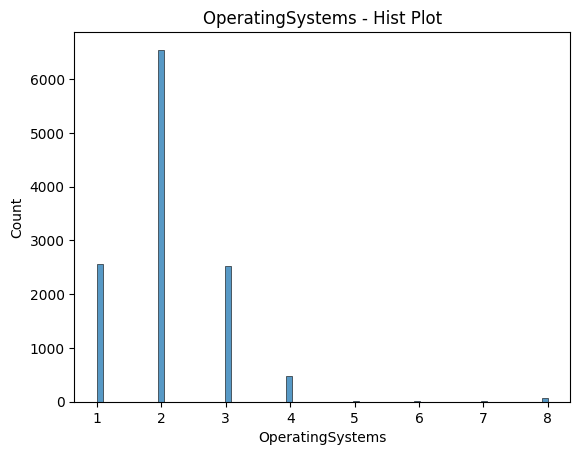

In [41]:
sns.histplot(data=df, x='OperatingSystems')
plt.title('OperatingSystems - Hist Plot')
plt.show()

В наборе данных 3 основных неизвестные операционные системы.

In [42]:
df_gr_os = df.groupby(by=['OperatingSystems']).agg(RevenueMean=('Revenue', 'mean')).reset_index(drop=False)
df_gr_os = df_gr_os.sort_values(by=['RevenueMean'], ascending=[False]).reset_index(drop=True)
df_gr_os

,OperatingSystems,RevenueMean
0,8,0.226667
1,4,0.177824
2,2,0.176417
3,5,0.166667
4,1,0.148221
5,7,0.142857
6,3,0.105845
7,6,0.105263


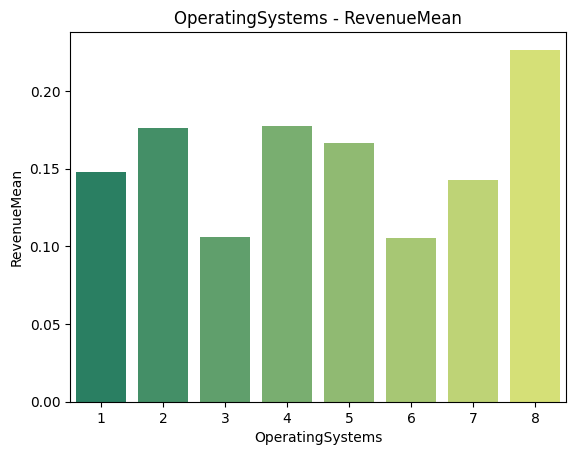

In [43]:
sns.barplot(data=df_gr_os, x='OperatingSystems', y='RevenueMean', palette='summer')
plt.title('OperatingSystems - RevenueMean')
plt.show()

При этом доля покупок наибольшая у одной из наименее популярных операционных систем - 8.

## Browser

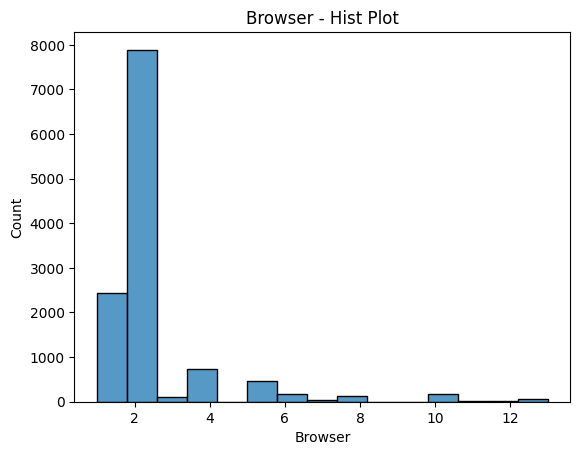

In [44]:
sns.histplot(data=df, x='Browser')
plt.title('Browser - Hist Plot')
plt.show()

Среди браузеров есть доминирующий - 2.

In [45]:
df_gr_browser = df.groupby(by=['Browser']).agg(RevenueMean=('Revenue', 'mean')).reset_index(drop=False)
df_gr_browser = df_gr_browser.sort_values(by=['RevenueMean'], ascending=[False]).reset_index(drop=True)
df_gr_browser

,Browser,RevenueMean
0,12,0.300000
1,13,0.285714
2,10,0.196319
3,5,0.184946
4,4,0.177596
5,11,0.166667
6,8,0.155556
7,2,0.155006
8,1,0.149897
9,7,0.122449


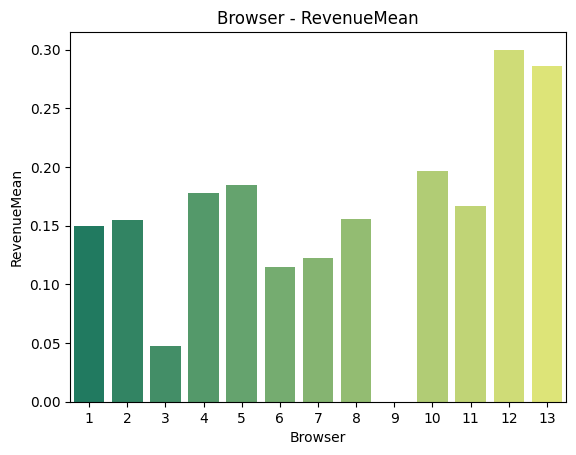

In [46]:
sns.barplot(data=df_gr_browser, x='Browser', y='RevenueMean', palette='summer')
plt.title('Browser - RevenueMean')
plt.show()

При этом доля покупок наибольшая у одних из наименее популярных браузеров - 12 и 13.

## Region

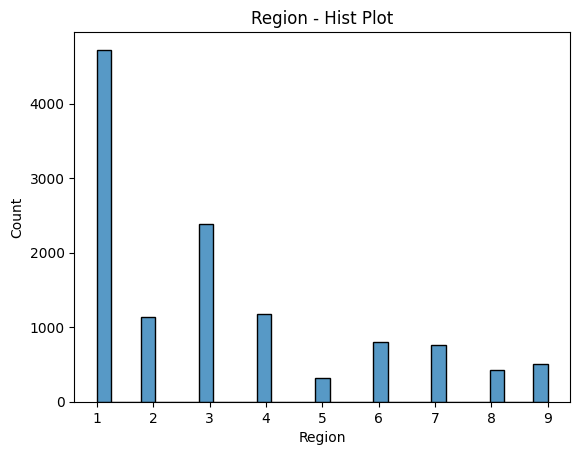

In [47]:
sns.histplot(data=df, x='Region')
plt.title('Region - Hist Plot')
plt.show()

Наиболее популярный регион - 1.

In [48]:
df_gr_region = df.groupby(by=['Region']).agg(RevenueMean=('Revenue', 'mean')).reset_index(drop=False)
df_gr_region = df_gr_region.sort_values(by=['RevenueMean'], ascending=[False]).reset_index(drop=True)
df_gr_region

,Region,RevenueMean
0,9,0.170297
1,2,0.166225
2,5,0.163522
3,1,0.163278
4,7,0.156992
5,4,0.149190
6,3,0.146577
7,6,0.139825
8,8,0.129630


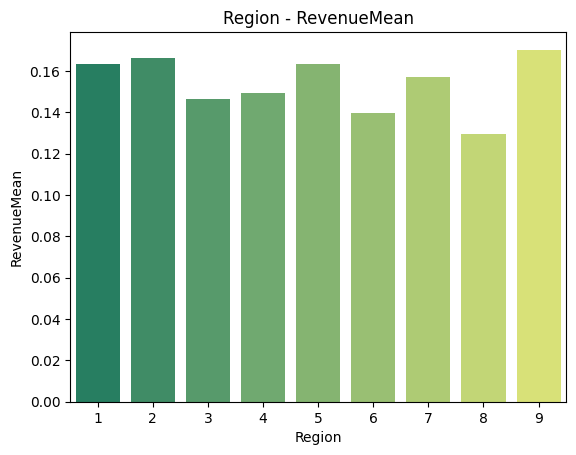

In [49]:
sns.barplot(data=df_gr_region, x='Region', y='RevenueMean', palette='summer')
plt.title('Region - RevenueMean')
plt.show()

Доля покупки довольно равномерно распределена между регионами.

## TrafficType

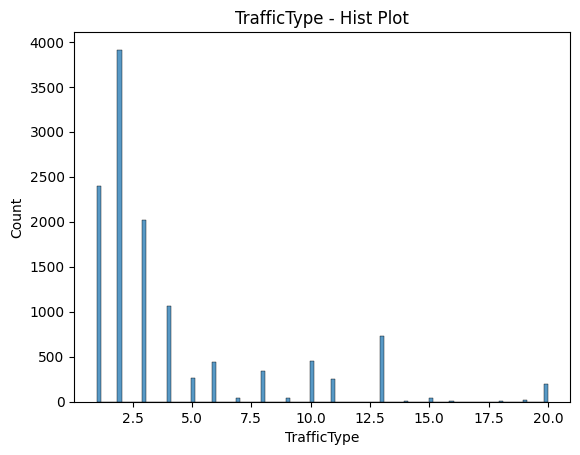

In [50]:
sns.histplot(data=df, x='TrafficType')
plt.title('TrafficType - Hist Plot')
plt.show()

Выделяются три основных канала трафика: 2, 1, 3.

In [51]:
df_gr_traffic = df.groupby(by=['TrafficType']).agg(RevenueMean=('Revenue', 'mean')).reset_index(drop=False)
df_gr_traffic = df_gr_traffic.sort_values(by=['RevenueMean'], ascending=[False]).reset_index(drop=True)
df_gr_traffic

,TrafficType,RevenueMean
0,16,0.333333
1,7,0.300000
2,8,0.276968
3,20,0.259067
4,2,0.216513
5,5,0.215385
6,10,0.200000
7,11,0.190283
8,4,0.154784
9,14,0.153846


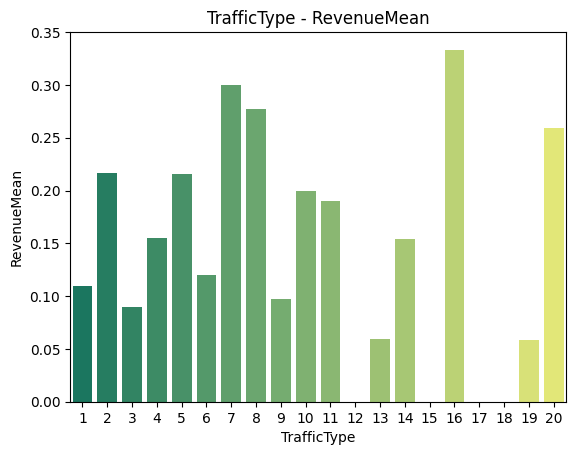

In [52]:
sns.barplot(data=df_gr_traffic, x='TrafficType', y='RevenueMean', palette='summer')
plt.title('TrafficType - RevenueMean')
plt.show()

При этом наибольшая доля покупки приходится на канал трафика 16.

## VisitorType

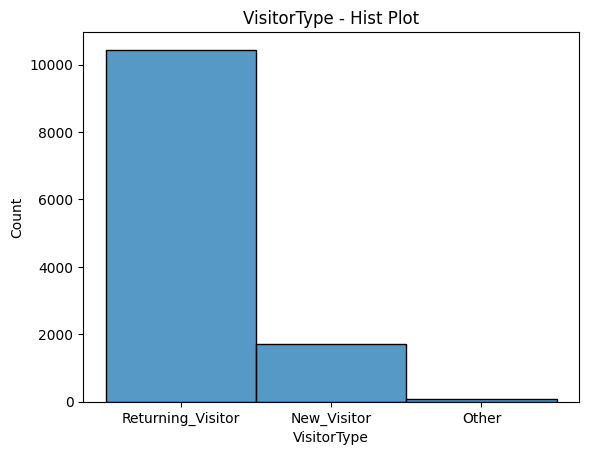

In [53]:
sns.histplot(data=df, x='VisitorType')
plt.title('VisitorType - Hist Plot')
plt.show()

В основном наблюдения содержат данные о действующих пользователях.

In [54]:
df_gr_visitor = df.groupby(by=['VisitorType']).agg(RevenueMean=('Revenue', 'mean')).reset_index(drop=False)
df_gr_visitor = df_gr_visitor.sort_values(by=['RevenueMean'], ascending=[False]).reset_index(drop=True)
df_gr_visitor

,VisitorType,RevenueMean
0,New_Visitor,0.249115
1,Other,0.197531
2,Returning_Visitor,0.140724


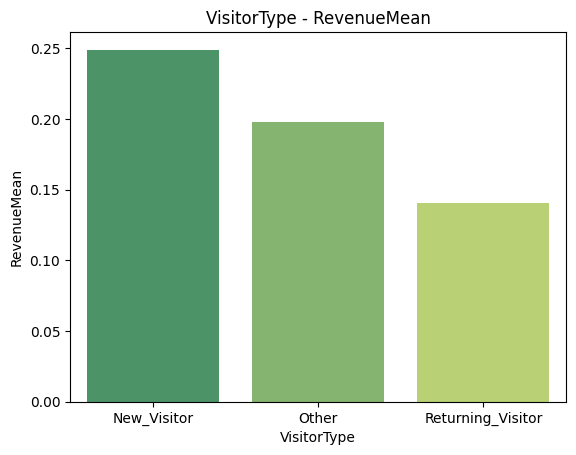

In [55]:
sns.barplot(data=df_gr_visitor, x='VisitorType', y='RevenueMean', palette='summer')
plt.title('VisitorType - RevenueMean')
plt.show()

Доля покупок наибольшая для новых пользователей.

## Weekend

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


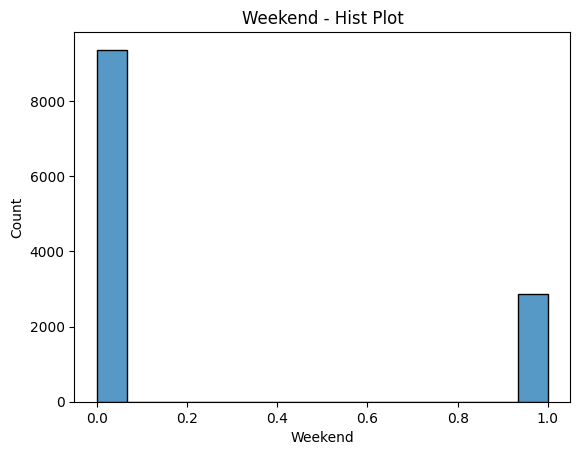

In [56]:
sns.histplot(data=df, x='Weekend')
plt.title('Weekend - Hist Plot')
plt.show()

In [57]:
df_gr_weekend = df.groupby(by=['Weekend']).agg(RevenueMean=('Revenue', 'mean')).reset_index(drop=False)
df_gr_weekend = df_gr_weekend.sort_values(by=['RevenueMean'], ascending=[False]).reset_index(drop=True)
df_gr_weekend

,Weekend,RevenueMean
0,True,0.174415
1,False,0.150534


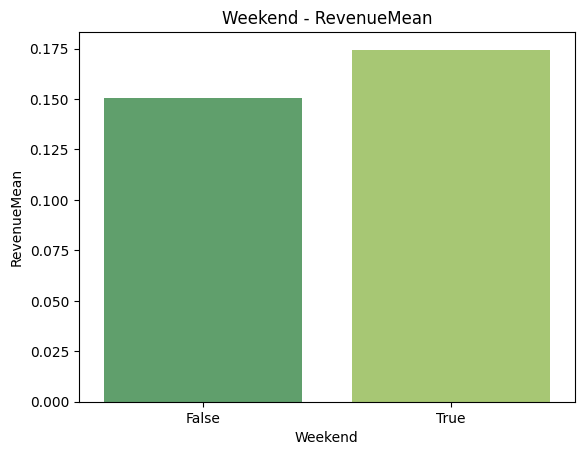

In [58]:
sns.barplot(data=df_gr_weekend, x='Weekend', y='RevenueMean', palette='summer')
plt.title('Weekend - RevenueMean')
plt.show()

Доля покупок выше для выходного дня.

# 3. Построить матрицу корреляций

In [59]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [60]:
for var in ['Month', 'OperatingSystems', 'Browser', 'Region', 
            'TrafficType', 'VisitorType', 'Weekend', 'Revenue']:
    df[var] = df[var].astype('category')

## Корреляция между числовыми признаками

<AxesSubplot: >

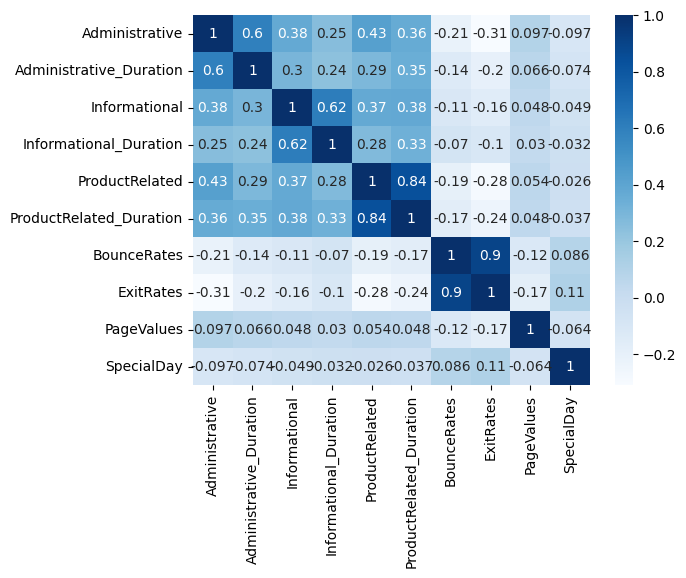

In [61]:
corr = df.corr(method='pearson')

sns.heatmap(corr, cmap='Blues', annot=True)

В наборе данных есть сильно коррелирующие друг с другом переменные, отвечающие за просмотр страниц административных, информационных и продуктовых. Они коррелируют с переменными продолжительности просмотра соответствующих страниц.

## Корреляция между категориальными признаками

<AxesSubplot: >

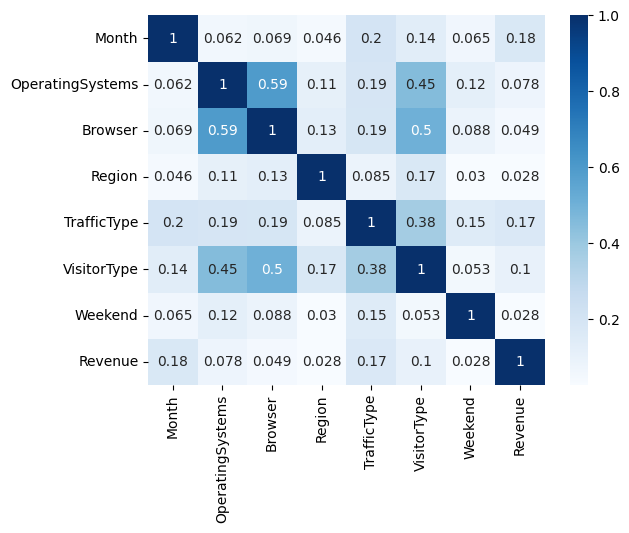

In [62]:
cramersv = am.CramersV(df)

sns.heatmap(cramersv.fit(), cmap='Blues', annot=True)

В наборе данных есть несколько пар коррелирующих друг с другом категориальных признаков: операционная система и браузер, тип посетителя и операционная система, тип посетителя и браузер.

In [63]:
data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'category' and df[c2].dtype != 'category':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(data)
AnovaRes

,Category,Numerical,Is correlated
0,Month,Administrative,Yes
1,Month,Administrative_Duration,Yes
2,Month,Informational,Yes
3,Month,Informational_Duration,Yes
4,Month,ProductRelated,Yes
...,...,...,...
75,Revenue,ProductRelated_Duration,Yes
76,Revenue,BounceRates,Yes
77,Revenue,ExitRates,Yes
78,Revenue,PageValues,Yes


In [64]:
AnovaRes['Is correlated'].value_counts()

Yes    66
No     14
Name: Is correlated, dtype: int64

In [65]:
AnovaRes[AnovaRes['Is correlated'] == 'No']

,Category,Numerical,Is correlated
10,OperatingSystems,Administrative,No
13,OperatingSystems,Informational_Duration,No
21,Browser,Administrative_Duration,No
30,Region,Administrative,No
31,Region,Administrative_Duration,No
33,Region,Informational_Duration,No
36,Region,BounceRates,No
37,Region,ExitRates,No
39,Region,SpecialDay,No
61,Weekend,Administrative_Duration,No


Лишь для небольшого количества пар категориальных и числовых признаков отсутствует корреляция.

# 4. Провести анализ целевой переменной

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot: xlabel='Revenue', ylabel='Count'>

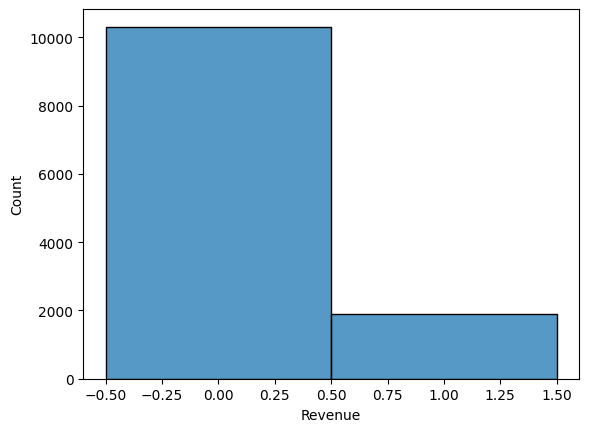

In [66]:
sns.histplot(data=df, x='Revenue')

In [67]:
df['Revenue'].value_counts(normalize=True)

False    0.843875
True     0.156125
Name: Revenue, dtype: float64

Целевая переменная в наборе данных не сбалансированная, что может сказаться на качестве решения задачи классификации в дальнейшейм. Большая часть наблюдений приходится на случаи, когда не проводилась транзакция покупки.

# 5. Провести сравнение скорости работы Pandas и Polars на увеличенном датасете

In [68]:
df_big = df.copy()

for i in range(100):
  df_big = pd.concat([df_big, df])

df_big.to_csv('online_shoppers_intetion_big.csv', index=False)

In [69]:
df_big.shape[0]

1234321

## Загрузка данных

In [70]:
%%time

df_big = pd.read_csv('online_shoppers_intetion_big.csv')

CPU times: total: 6.06 s
Wall time: 6.11 s


In [71]:
%%time

df_big_pl = pl.read_csv('online_shoppers_intetion_big.csv')

CPU times: total: 3.06 s
Wall time: 505 ms


## Фильтрация данных

In [72]:
%%time

df_big[df_big['Month'] == 'Nov']

CPU times: total: 391 ms
Wall time: 389 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5389,1,39.2,2,120.8,7,80.500000,0.000000,0.010000,0.000000,0.0,Nov,3,2,4,2,New_Visitor,True,False
5390,3,89.6,0,0.0,57,1721.906667,0.000000,0.005932,204.007949,0.0,Nov,2,2,1,4,Returning_Visitor,True,True
5393,4,204.2,0,0.0,31,652.376667,0.012121,0.016162,0.000000,0.0,Nov,1,1,6,1,Returning_Visitor,False,False
5405,0,0.0,0,0.0,13,710.066667,0.000000,0.007692,72.522838,0.0,Nov,1,1,2,2,Returning_Visitor,False,True
5420,0,0.0,0,0.0,24,968.692424,0.000000,0.000000,106.252517,0.0,Nov,1,1,9,2,Returning_Visitor,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234315,0,0.0,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
1234317,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
1234318,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
1234319,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [73]:
%%time

df_big_pl.filter(pl.col('Month') == 'Nov')

CPU times: total: 297 ms
Wall time: 79 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
1,39.2,2,120.8,7,80.5,0.0,0.01,0.0,0.0,"""Nov""",3,2,4,2,"""New_Visitor""",true,false
3,89.6,0,0.0,57,1721.906667,0.0,0.005932,204.007949,0.0,"""Nov""",2,2,1,4,"""Returning_Visi…",true,true
4,204.2,0,0.0,31,652.376667,0.012121,0.016162,0.0,0.0,"""Nov""",1,1,6,1,"""Returning_Visi…",false,false
0,0.0,0,0.0,13,710.066667,0.0,0.007692,72.522838,0.0,"""Nov""",1,1,2,2,"""Returning_Visi…",false,true
0,0.0,0,0.0,24,968.692424,0.0,0.0,106.252517,0.0,"""Nov""",1,1,9,2,"""Returning_Visi…",false,true
13,1013.056909,2,102.8,77,2697.022104,0.0,0.009471,1.79867,0.0,"""Nov""",1,1,9,2,"""Returning_Visi…",false,false
1,86.6,0,0.0,14,349.57619,0.0,0.004762,60.437378,0.0,"""Nov""",1,1,1,3,"""New_Visitor""",false,true
6,545.65,3,204.346667,69,1182.432333,0.000685,0.002998,19.715295,0.0,"""Nov""",2,2,1,13,"""Returning_Visi…",true,true
3,94.6,0,0.0,16,1254.0,0.0,0.019328,0.0,0.0,"""Nov""",3,2,7,2,"""New_Visitor""",true,false


## Агрегация данных

In [74]:
%%time

df_big_gr_month = df_big.groupby(by=['Month']).agg(RevenueMean=('Revenue', 'mean')).reset_index(drop=False)
df_big_gr_month = df_big_gr_month.sort_values(by=['RevenueMean'], ascending=[False]).reset_index(drop=True)
df_big_gr_month

CPU times: total: 297 ms
Wall time: 325 ms


,Month,RevenueMean
0,Nov,0.253963
1,Oct,0.211009
2,Sep,0.192825
3,Aug,0.183633
4,Jul,0.149184
5,Dec,0.125590
6,May,0.109469
7,Mar,0.102316
8,June,0.101754
9,Feb,0.016575


In [75]:
%%time

df_big_pl.groupby('Month').agg([pl.mean('Revenue')])

CPU times: total: 219 ms
Wall time: 112 ms


Month,Revenue
str,f64
"""Dec""",0.12559
"""Jul""",0.149184
"""Oct""",0.211009
"""June""",0.101754
"""Mar""",0.102316
"""Nov""",0.253963
"""Sep""",0.192825
"""May""",0.109469
"""Aug""",0.183633


Polars показала лучшую производительность по сравнению с Pandas.